In [5]:
import sys
import numpy as np
from scipy.stats import wishart, chi2, norm, gamma
import matplotlib.pyplot as plt
sys.path.insert(1, '/home/joeadamo/Research')
from CovNet import CovaPT
sys.path.append('/home/joeadamo/Research/Software')
from pk_tools import pk_tools

plt.rcParams['figure.facecolor'] = 'white'

In [6]:
# load in data / model vectors and a covariance matrix
BOSS_dir = "/home/joeadamo/Research/Data/BOSS-DR12/Updated/"
W = pk_tools.read_matrix(BOSS_dir+"W_CMASS_North.matrix")
M = pk_tools.read_matrix(BOSS_dir+"M_CMASS_North.matrix")

pk_dict = pk_tools.read_power(BOSS_dir+"P_CMASS_North.dat" , combine_bins =10)
data_vector = np.concatenate([pk_dict["pk0"], pk_dict["pk2"]])

cosmo_fid = np.array([67.77,0.11827,1.016, 1.9485,-0.5387, 0.1, 5., 15., 100, 5e3])
model_vector = CovaPT.Pk_CLASS_PT(cosmo_fid)
model_vector = np.concatenate((model_vector[0], model_vector[2], model_vector[4]))
model_vector = np.matmul(M, model_vector)
model_vector = np.matmul(W, model_vector)

C_fid_file = np.load("/home/joeadamo/Research/CovNet/Data/Cov_Fid.npz")
C = C_fid_file["C_G"] + C_fid_file["C_SSC"] + C_fid_file["C_T0"]

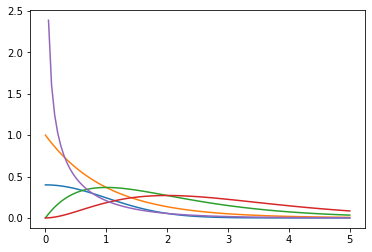

In [10]:
x = np.linspace(0, 5, 100)
gaussian_dist = norm(0,1)

plt.plot(x, gaussian_dist.pdf(x))
plt.plot(x, gamma.pdf(x, 1))
plt.plot(x, gamma.pdf(x, 2))
plt.plot(x, gamma.pdf(x, 3))

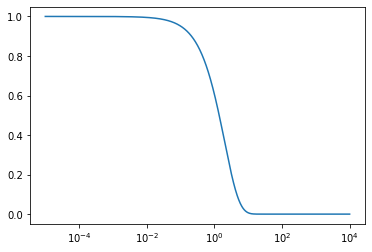

In [9]:
# visualize the gaussian likelihood
chi_squared = np.logspace(-5, 4, 1000)

Likelihood_gaussian = np.exp(-0.5*chi_squared)

plt.plot(chi_squared, Likelihood_gaussian)
plt.xscale("log")

In [ ]:
# https://www.stat.pitt.edu/sungkyu/course/2221Fall13/lec2.pdf
